In [53]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics, impute
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import graphviz 
from tqdm import tqdm
import statistics

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [54]:
#df_in = pd.read_excel("/content/drive/MyDrive/RESEARCH/PROJECTS/Erez Nossek - Bypass flow/Flow800 data 102621 deid.xlsx") #old one
df_in = pd.read_excel("/content/drive/MyDrive/RESEARCH/PROJECTS/Erez Nossek - Bypass flow/Flow800 data 021022 - eko.xlsx") #new one
print(df_in.columns)
print(df_in.shape)
df_in.head()


Index(['patient_id', 'measurement_time', 'ischemia', 'Name', 'MRN', 'gender',
       'side', 'Age', 'Presentaion symptoms ', 'Ischemic/ hemorrhagic',
       'pre operative hypoperfusion', 'ICG mg pre', 'ICG mg post',
       'proximal recipient Delay ', 'proximal recipient Speed ',
       'proximal recipient TTP ', 'proximal recipient RT ',
       'Distal recipient Delay ', 'Distal recipient Speed ',
       'Distal recipient TTP ', 'Distal recipient RT ', 'adjacent gyrus Delay',
       'adjacent gyrus Speed', 'adjacent gyrus TTP', 'adjacent gyrus RT',
       'Remote gyrus Delay', 'Remote gyrus Speed', 'Remote gyrus TTP',
       'Remote gyrus RT'],
      dtype='object')
(44, 29)


,patient_id,measurement_time,ischemia,Name,MRN,gender,side,Age,Presentaion symptoms,Ischemic/ hemorrhagic,...,Distal recipient TTP,Distal recipient RT,adjacent gyrus Delay,adjacent gyrus Speed,adjacent gyrus TTP,adjacent gyrus RT,Remote gyrus Delay,Remote gyrus Speed,Remote gyrus TTP,Remote gyrus RT
0,1,Pre,1,Vasques,NaN,f,NaN,NaN,NaN,I,...,6.64,4.17,3.10,111,6.93,4.03,2.63,75,6.91,4.17
1,11,Post,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.51,3.04,2.42,505,5.42,2.88,3.86,127,6.91,4.02
2,2,Pre,1,"Heath, Tamara",NaN,f,Left,NaN,NaN,I,...,5.69,3.20,3.79,123,6.88,4.29,4.43,83,6.90,4.08
3,22,Post,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.88,4.31,3.39,161,6.89,4.36,3.66,159,6.82,4.45
4,3,Pre,0,Wu,NaN,m,NaN,NaN,NaN,H,...,6.83,4.93,1.65,79,6.90,4.46,1.14,62,6.85,4.92


In [55]:
#mask out the post
df_pre = df_in[df_in["measurement_time"]=="Pre"]

#split train/test
df_pre_train = df_pre[df_pre['patient_id'] < 12] 
df_pre_test = df_pre[df_pre['patient_id'] >= 12]
#df_pre_train = df_pre
#df_pre_test = df_pre

#declare features and labels
features = ['proximal recipient Delay ', 'proximal recipient Speed ',
       'proximal recipient TTP ', 'proximal recipient RT ',
       'Distal recipient Delay ', 'Distal recipient Speed ',
       'Distal recipient TTP ', 'Distal recipient RT ', 'adjacent gyrus Delay',
       'adjacent gyrus Speed', 'adjacent gyrus TTP', 'adjacent gyrus RT',
       'Remote gyrus Delay', 'Remote gyrus Speed', 'Remote gyrus TTP',
       'Remote gyrus RT']

labels = ['ischemia']

#declare X and y
X = df_pre[features]
X_train = df_pre_train[features]
X_test = df_pre_test[features]

y = df_pre['ischemia']
y_train = df_pre_train['ischemia']
y_test = df_pre_test['ischemia']

#impute columns
imp = impute.KNNImputer(missing_values=np.nan)
imp.fit(X)
X_train = imp.transform(X_train)
X_train = pd.DataFrame(X_train, columns = features) #make back into dataframe

imp = impute.KNNImputer(missing_values=np.nan)
imp.fit(X)
X_test = imp.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features) #make back into dataframe



Accuracy: 0.6363636363636364
[1 0 1 0 0 1 0 1 1 0 0]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


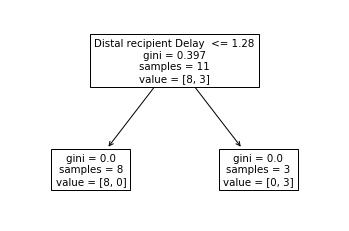

In [56]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
tree.plot_tree(clf, feature_names=features)

#test tree
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
print(y_proba)


## Nice visualization of the training result

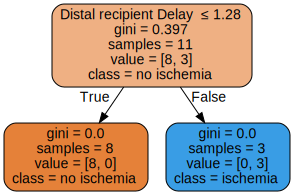

In [57]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features,
                                class_names=["no ischemia","ischemia"],
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

## Nice visualization of the test result

In [58]:
#test tree
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(y_pred)
print(y_proba)


Accuracy: 0.6363636363636364
[1 0 1 0 0 1 0 1 1 0 0]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Now let's do all and prep for Bootstrapping and visualize PCA

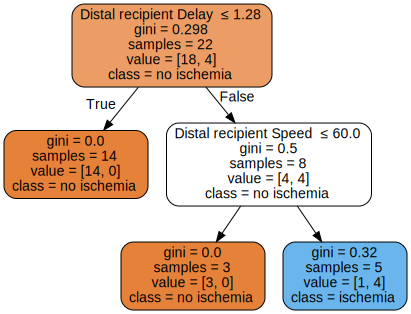

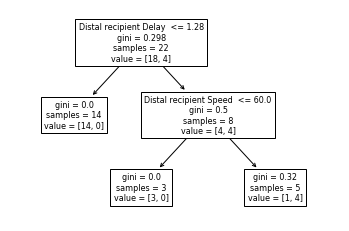

In [59]:
#declare features and labels
features = ['proximal recipient Delay ', 'proximal recipient Speed ',
       'proximal recipient TTP ', 'proximal recipient RT ',
       'Distal recipient Delay ', 'Distal recipient Speed ',
       'Distal recipient TTP ', 'Distal recipient RT ', 'adjacent gyrus Delay',
       'adjacent gyrus Speed', 'adjacent gyrus TTP', 'adjacent gyrus RT',
       'Remote gyrus Delay', 'Remote gyrus Speed', 'Remote gyrus TTP',
       'Remote gyrus RT']

labels = ['ischemia']

#mask out the post
df_pre = df_in[df_in["measurement_time"]=="Pre"]

#declare X and y
X = df_pre[features]
y = df_pre[labels]

#Split train/test
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=None, test_size=0.4)
train_X = X
train_y = y

#impute columns
imp = impute.KNNImputer(missing_values=np.nan)
imp.fit(train_X)
train_X = imp.transform(train_X)
val_X = train_X
val_y = train_y
train_X = pd.DataFrame(train_X, columns = features) #make back into dataframe

#Fit and run model
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(train_X,train_y)
tree.plot_tree(clf, feature_names=features)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=features,
                                class_names=["no ischemia","ischemia"],
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 


In [60]:
y_pred = clf.predict(val_X)
y_proba = clf.predict_proba(val_X)
print("Accuracy:",metrics.accuracy_score(val_y, y_pred))
print(y_pred)
print(val_y)
#print(y_proba)

Accuracy: 0.9545454545454546
[1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
    ischemia
0          1
2          1
4          0
6          0
8          0
10         0
12         0
14         0
16         0
18         1
20         0
22         0
24         0
26         1
28         0
30         0
32         0
34         0
36         0
38         0
40         0
42         0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [61]:
acc_list = []
feature_list = []

acc_list.append(metrics.accuracy_score(val_y, y_pred))
feature_list.append(dict(zip(clf.feature_names_in_,clf.feature_importances_)))

### PCA

In [34]:
# PCA GOES HERE

# You must normalize the data before applying the fit method
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(train_X)

# Reformat and view results
loadings = pandas.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

NameError: ignored

# Bootstrap it

In [74]:
def fit_tree(max_depth=2):
  #declare features and labels
  features = ['proximal recipient Delay ', 'proximal recipient Speed ',
        'proximal recipient TTP ', 'proximal recipient RT ',
        'Distal recipient Delay ', 'Distal recipient Speed ',
        'Distal recipient TTP ', 'Distal recipient RT ', 'adjacent gyrus Delay',
        'adjacent gyrus Speed', 'adjacent gyrus TTP', 'adjacent gyrus RT',
        'Remote gyrus Delay', 'Remote gyrus Speed', 'Remote gyrus TTP',
        'Remote gyrus RT']

  labels = ['ischemia']

  #mask out the post
  df_pre = df_in[df_in["measurement_time"]=="Pre"]

  #declare X and y
  X = df_pre[features]
  y = df_pre[labels]

  #Split train/test
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=None, test_size=0.4)

  #impute columns
  imp = impute.KNNImputer(missing_values=np.nan)
  imp.fit(train_X)
  train_X = imp.transform(train_X)
  val_X = imp.transform(val_X)
  train_X = pd.DataFrame(train_X, columns = features) #make back into dataframe

  #Fit and run model
  clf = tree.DecisionTreeClassifier(max_depth = max_depth)
  clf = clf.fit(train_X,train_y)

  y_pred = clf.predict(val_X)
  y_proba = clf.predict_proba(val_X)

  return metrics.accuracy_score(val_y, y_pred), dict(zip(clf.feature_names_in_,clf.feature_importances_))

In [85]:
acc_list = []
feature_list = []

for i in tqdm(range(0,100)):
  acc, features = fit_tree(max_depth=2)
  acc_list.append(acc)
  feature_list.append(features)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but

In [86]:
#Average Accuracy across 100 runs
statistics.mean(acc_list)

0.7022222222222222

In [87]:
#Average feature importance across 100 runs
df_feats = pd.DataFrame(feature_list)

In [88]:
df_feats.describe()

,proximal recipient Delay,proximal recipient Speed,proximal recipient TTP,proximal recipient RT,Distal recipient Delay,Distal recipient Speed,Distal recipient TTP,Distal recipient RT,adjacent gyrus Delay,adjacent gyrus Speed,adjacent gyrus TTP,adjacent gyrus RT,Remote gyrus Delay,Remote gyrus Speed,Remote gyrus TTP,Remote gyrus RT
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.094683,0.023939,0.028863,0.007879,0.269745,0.026416,0.052765,0.073509,0.043376,0.037189,0.040623,0.033221,0.048422,0.008002,0.040225,0.141142
std,0.265811,0.127182,0.121169,0.055429,0.316898,0.110338,0.154039,0.179734,0.154567,0.162865,0.132897,0.108358,0.166912,0.056302,0.140824,0.281257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.518519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.756250,0.393939,1.000000,0.722222,0.722222,0.756250,0.756250,1.000000,0.541667,0.606061,1.000000,0.406250,0.756250,1.000000


In [73]:
acc_list = []
feature_list = []

for i in tqdm(range(0,10000)):
  acc, features = fit_tree(max_depth=2)
  acc_list.append(acc)
  feature_list.append(features)

#Average Accuracy across 10000 runs
print("Average acc: {}".format(statistics.mean(acc_list)))

#Average feature importance across 10000 runs
df_feats = pd.DataFrame(feature_list)
df_feats.describe()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid featur

Average acc: 0.6946777777777777


,proximal recipient Delay,proximal recipient Speed,proximal recipient TTP,proximal recipient RT,Distal recipient Delay,Distal recipient Speed,Distal recipient TTP,Distal recipient RT,adjacent gyrus Delay,adjacent gyrus Speed,adjacent gyrus TTP,adjacent gyrus RT,Remote gyrus Delay,Remote gyrus Speed,Remote gyrus TTP,Remote gyrus RT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.106112,0.023136,0.023240,0.019636,0.220623,0.035884,0.050453,0.132028,0.042478,0.024726,0.053477,0.046796,0.033276,0.012895,0.036308,0.119934
std,0.242556,0.113172,0.107305,0.103048,0.304424,0.127708,0.152759,0.271703,0.167261,0.122252,0.155201,0.135124,0.148951,0.076231,0.148733,0.272736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.518519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.756250,1.000000,1.000000
